In [3]:
import sys
import matplotlib.pyplot as plt

In [4]:
file_path = input("File path:")
sender_node = "_" + input("Sender:") +"_"
receiver_node = "_" + input("Receiver:") + "_"

#Example: file path: 1p5mbps/wireless.tr
#         Sender: 0
#         Receiver: 7

File path:155mbps/wireless.tr
Sender:2
Receiver:8


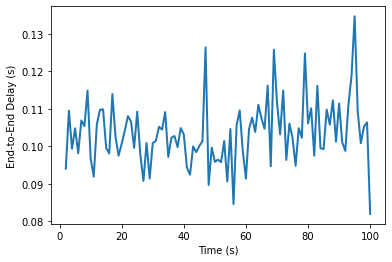

In [5]:
file = open(file_path, 'r')
lines = file.readlines()

sent = dict()
y = [0] * 101
cnt = [0] * 101

for line in lines[10:]:
    words = line.split()    

    trace_level = words[3]
    payload_type = words[6]
    current_node = words[2]
    event_tpye = words[0]
    packet_id = int(words[5])
    time = float(words[1])
    time_int = int(time)
    
    if packet_id == 0:
        continue

    if words[0] == "s" and words[2] == sender_node:
        sent[(sender_node, packet_id, payload_type, trace_level)] = time

    if words[0] == "r" and (sender_node, packet_id, payload_type, trace_level) in sent:
        delay = time - sent[(sender_node, packet_id, payload_type, trace_level)]
        y[time_int] += delay
        cnt[time_int] += 1
    
    

y = [y[i]/cnt[i] for i in range(2, len(y))]

x = [i for i in range(2, 101)]



fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)
plt.xlabel("Time (s)")
plt.ylabel("End-to-End Delay (s)")

plt.show()